In [41]:
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

train_data = pd.read_csv('/Users/chaseli/Desktop/BA/AutoML/datasets/data/TT_Dataset/train.csv')
test_data = pd.read_csv('/Users/chaseli/Desktop/BA/AutoML/datasets/data/TT_Dataset/test.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)



In [42]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


    Age  SibSp  Parch     Fare
0  22.0      1      0   7.2500
1  38.0      1      0  71.2833
2  26.0      0      0   7.9250
3  35.0      1      0  53.1000
4  35.0      0      0   8.0500


<AxesSubplot: >

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Age')

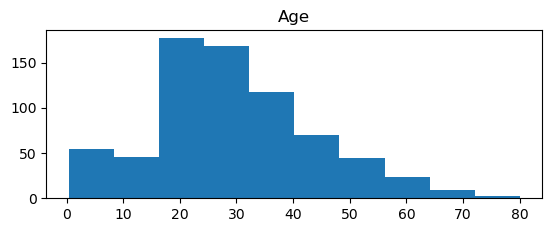

<AxesSubplot: >

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'SibSp')

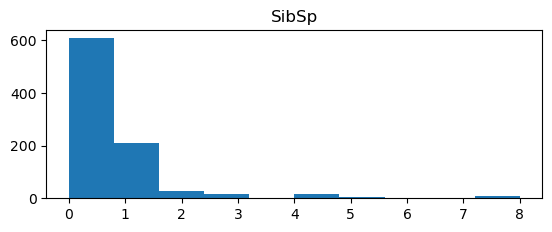

<AxesSubplot: >

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Parch')

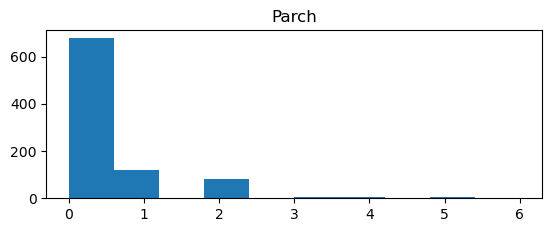

<AxesSubplot: >

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Fare')

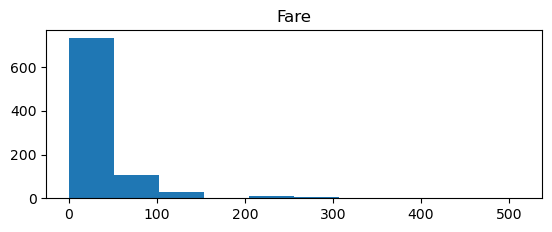

____________________________________________________________________________________________________




<AxesSubplot: >

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


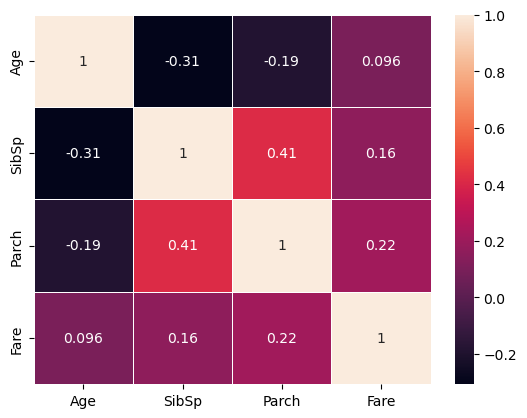

In [43]:
df_num = train_data[['Age', 'SibSp', 'Parch', 'Fare']]

print(df_num.head())
for col in df_num.columns:
    plt.subplot(211)
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()

print('_' * 100)
print('\n')

# correlation of the numeric data
sbs.heatmap(df_num.corr(),linewidths=.5, annot=True)

# compare the survival rate across numeric data
pd.pivot_table(train_data, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

<AxesSubplot: >

Text(0.5, 1.0, 'Pclass')

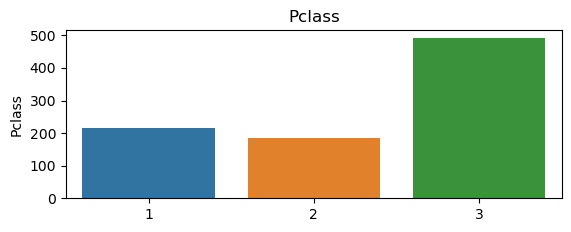

<AxesSubplot: >

Text(0.5, 1.0, 'Sex')

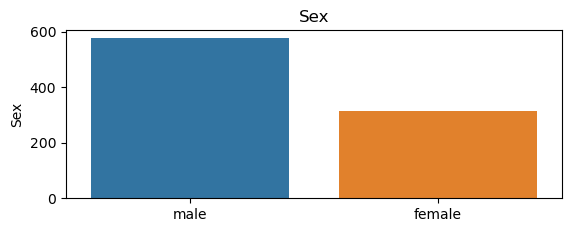

<AxesSubplot: >

Text(0.5, 1.0, 'Ticket')

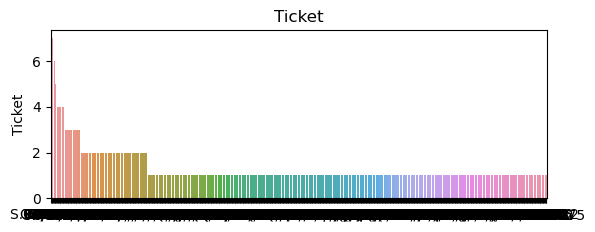

<AxesSubplot: >

Text(0.5, 1.0, 'Cabin')

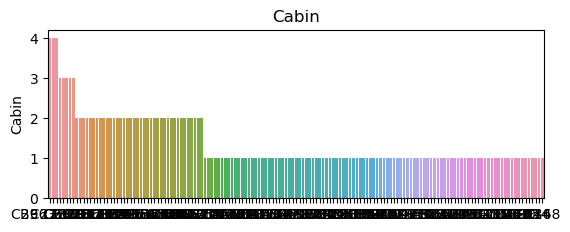

<AxesSubplot: >

Text(0.5, 1.0, 'Embarked')

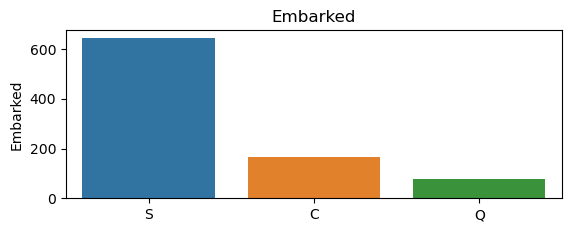

In [44]:
df_cat = train_data[['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

for i in df_cat.columns:
    plt.subplot(211)
    sbs.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

In [45]:
df_piv_pclass = pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc='count')

for i in df_piv_pclass:
    df_piv_pclass[i] = ((df_piv_pclass[i] / df_piv_pclass[i].sum()) * 100).round(decimals=1)

print(df_piv_pclass)
print()


df_piv_sex = pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc='count')

for i in df_piv_sex:
    df_piv_sex[i] = ((df_piv_sex[i] / df_piv_sex[i].sum()) * 100).round(decimals=1)

print(df_piv_sex)
print()


df_piv_embarked = pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc='count')

for i in df_piv_embarked:
    df_piv_embarked[i] = ((df_piv_embarked[i] / df_piv_embarked[i].sum()) * 100).round(decimals=1)

print(df_piv_embarked)

Pclass       1     2     3
Survived                  
0         37.0  52.7  75.8
1         63.0  47.3  24.2

Sex       female  male
Survived              
0           25.8  81.1
1           74.2  18.9

Embarked     C     Q     S
Survived                  
0         44.6  61.0  66.3
1         55.4  39.0  33.7


1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object
1     C
3     C
6     E
10    G
11    C
Name: Deck, dtype: object


Text(0.5, 1.0, 'Deck')

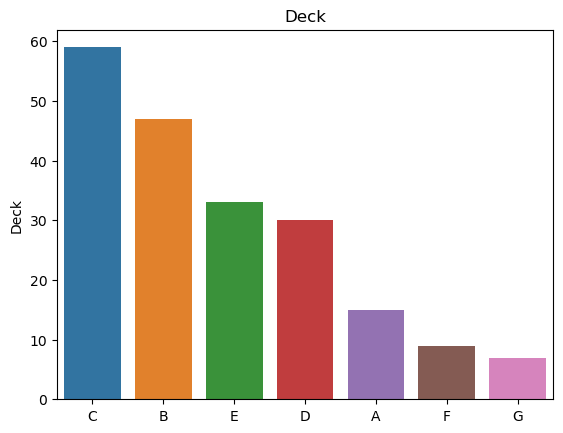


Deck         A     B     C     D     E     F     G
Survived                                          
0         53.3  25.5  40.7  23.3  24.2  22.2  71.4
1         46.7  74.5  59.3  76.7  75.8  77.8  28.6


In [46]:
# Split deck
df_cabin = train_data[['Cabin', 'Survived', 'Pclass', 'Sex']].dropna()
print(df_cabin['Cabin'].head())
# extract the first letter.
df_cabin['Deck'] = df_cabin['Cabin'].str.extract(r'(\w(?=\d))')
print(df_cabin['Deck'].head())

x_value = df_cabin['Deck'].value_counts().index
y_value = df_cabin['Deck'].value_counts()
sbs.barplot(x = x_value, 
            y = y_value
           ).set_title('Deck')
plt.show()

#  TODO Sorting of letters


df_piv_deck = pd.pivot_table(df_cabin, index = 'Survived', columns = 'Deck', values = 'Cabin', aggfunc='count')

for i in df_piv_deck:
    
    df_piv_deck[i] = ((df_piv_deck[i] / df_piv_deck[i].sum()) * 100).round(decimals=1)
    
print()
print(df_piv_deck)


# INFO:
# A cabins were on the highest deck
# G cabins were on the lowest deck

Text(0.5, 1.0, 'RoomCount')

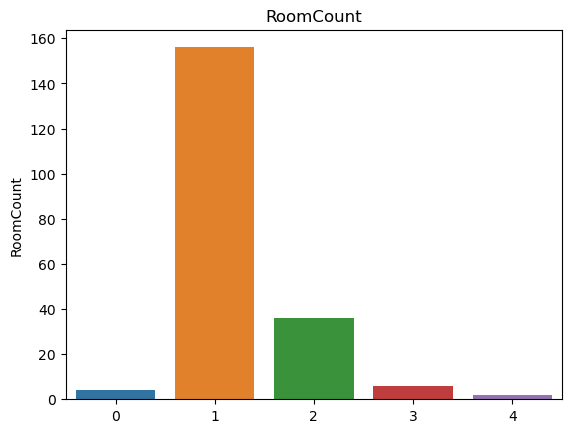


RoomCount     0     1     2     3      4
Survived                                
0          50.0  32.7  33.3  50.0    NaN
1          50.0  67.3  66.7  50.0  100.0


In [47]:
# multiple rooms
df_cabin['RoomCount'] = df_cabin['Cabin'].str.count(r'\w\d')


x_value = df_cabin['RoomCount'].value_counts().index
y_value = df_cabin['RoomCount'].value_counts()
sbs.barplot(x = x_value, 
            y = y_value
           ).set_title('RoomCount')
plt.show()

df_piv_rooms = pd.pivot_table(df_cabin, index = 'Survived', columns = 'RoomCount', values = 'Cabin', aggfunc='count')

for i in df_piv_rooms:
    df_piv_rooms[i] = ((df_piv_rooms[i] / df_piv_rooms[i].sum()) * 100).round(decimals=1)

print()
print(df_piv_rooms)

In [48]:
df_name = train_data[['Name', 'Survived']].dropna()

df_name['Title'] = df_name['Name'].str.extract('(?<=, )(\w+\s?\w*\.)')

print(df_name['Title'].value_counts())


df_piv_name = pd.pivot_table(df_name, index = 'Survived', columns = 'Title', values = 'Name', aggfunc='count')

for i in df_piv_name:
    df_piv_name[i] = ((df_piv_name[i] / df_piv_name[i].sum()) * 100).round(decimals=1)

print()
print(df_piv_name)

Mr.              517
Miss.            182
Mrs.             125
Master.           40
Dr.                7
Rev.               6
Mlle.              2
Major.             2
Col.               2
the Countess.      1
Capt.              1
Ms.                1
Sir.               1
Lady.              1
Mme.               1
Don.               1
Jonkheer.          1
Name: Title, dtype: int64

Title     Capt.  Col.   Don.   Dr.  Jonkheer.  Lady.  Major.  Master.  Miss.  Mlle.   Mme.   Mr.  Mrs.    Ms.   Rev.   Sir.  the Countess.
Survived                                                                                                                                  
0         100.0  50.0  100.0  57.1      100.0    NaN    50.0     42.5   30.2    NaN    NaN  84.3  20.8    NaN  100.0    NaN            NaN
1           NaN  50.0    NaN  42.9        NaN  100.0    50.0     57.5   69.8  100.0  100.0  15.7  79.2  100.0    NaN  100.0          100.0


In [49]:
# Average Age per Pclass
# Many missing values needs to be filled if possible
avg_1 = train_data[train_data['Pclass'] == 1]['Age'].mean().round(decimals=0)
avg_2 = train_data[train_data['Pclass'] == 2]['Age'].mean().round(decimals=0)
avg_3 = train_data[train_data['Pclass'] == 3]['Age'].mean().round(decimals=0)

data = [[1, avg_1],[2, avg_2],[3, avg_3]]
avg_Pclass =  pd.DataFrame(data, columns=['Pclass','avg Age'])

print(avg_Pclass)
print()


# Average Age per Pclass and Sex
avg_1_m = train_data[(train_data['Pclass'] == 1) & (train_data['Sex'] == 'male')]['Age'].mean().round(decimals=0)
avg_1_f = train_data[(train_data['Pclass'] == 1) & (train_data['Sex'] != 'male')]['Age'].mean().round(decimals=0)
avg_2_m = train_data[(train_data['Pclass'] == 2) & (train_data['Sex'] == 'male')]['Age'].mean().round(decimals=0)
avg_2_f = train_data[(train_data['Pclass'] == 2) & (train_data['Sex'] != 'male')]['Age'].mean().round(decimals=0)
avg_3_m = train_data[(train_data['Pclass'] == 3) & (train_data['Sex'] == 'male')]['Age'].mean().round(decimals=0)
avg_3_f = train_data[(train_data['Pclass'] == 3) & (train_data['Sex'] != 'male')]['Age'].mean().round(decimals=0)


avg_Pclass_Sex = pd.pivot_table(train_data, index = 'Pclass', columns = 'Sex', values = 'Age', aggfunc='mean')

print(avg_Pclass_Sex)

   Pclass  avg Age
0       1     38.0
1       2     30.0
2       3     25.0

Sex        female       male
Pclass                      
1       34.611765  41.281386
2       28.722973  30.740707
3       21.750000  26.507589


In [ ]:
def add_columns(dataframe):
    dataframe['Deck'] = dataframe['Cabin'].str.extract(r'(\w(?=\d))')
    #TODO fill missing deck with appropriate data 

    dataframe['RoomCount'] = dataframe['Cabin'].str.count(r'\w\d')
    
    dataframe['Title'] = dataframe['Name'].str.extract('(?<=, )(\w+\s?\w*\.)')
    
    return dataframe
    
    
train_data = add_columns(train_data)

In [ ]:
def fill_missing(df):
    # set 1. Pclass
    df.loc[(df['Age'].isna()) & (df['Pclass'] == 1) & (df['Sex'] == 'male'), 'Age'] = avg_1_m
    df.loc[(df['Age'].isna()) & (df['Pclass'] == 1) & (df['Sex'] != 'male'), 'Age'] = avg_1_f

    # set 2. Pclass
    df.loc[(df['Age'].isna()) & (df['Pclass'] == 2) & (df['Sex'] == 'male'), 'Age'] = avg_2_m
    df.loc[(df['Age'].isna()) & (df['Pclass'] == 2) & (df['Sex'] != 'male'), 'Age'] = avg_2_f

    # set 3. Pclass
    df.loc[(df['Age'].isna()) & (df['Pclass'] == 3) & (df['Sex'] == 'male'), 'Age'] = avg_3_m
    df.loc[(df['Age'].isna()) & (df['Pclass'] == 3) & (df['Sex'] != 'male'), 'Age'] = avg_3_f

    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    return df

train_data = fill_missing(train_data)
print(train_data.dtypes)

In [ ]:
import math

def clean_up(df):
    df.loc[df['Deck'].isnull(), 'Deck'] = 'Z'
    df['cleanDeck'] = [ord(x) - 64 for x in df['Deck']]
    
    df['cleanSex'] = pd.get_dummies(df['Sex'])['male']
    
    df['Mr.'] = pd.get_dummies(pd.Categorical(df['Title'], categories=['Mr.']))
    df['Mrs.'] = pd.get_dummies(pd.Categorical(df['Title'], categories=['Mrs.']))
    df['Miss.'] = pd.get_dummies(pd.Categorical(df['Title'], categories=['Miss.']))
    return df
    
    
train_data = clean_up(train_data)
print(train_data.dtypes)

In [ ]:
train_data.drop(columns = ['PassengerId','Name','Sex','Ticket', 'Cabin', 'Embarked', 'Deck', 'RoomCount'], inplace = True)


# ---------------------------------------
# good practice to use a clean dataframe
# but FEATURE only takes the needed columns
# so its nearly the same
print(train_data.dtypes)

/var/folders/_c/mh2fct9j0fq_k93mc3gxn_w40000gn/T/ipykernel_12090/3533513965.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbs.heatmap(train_data.corr(),linewidths=.5, annot=True)


<AxesSubplot: >

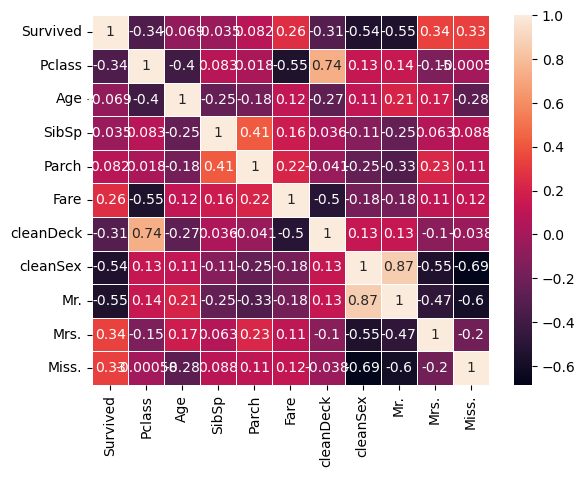

In [57]:
sbs.heatmap(train_data.corr(),linewidths=.5, annot=True)

In [59]:
from sklearn.model_selection import train_test_split

TARGET = "Survived"
FEATURES = ["Pclass", "Age", "cleanSex", "SibSp", "Parch", "Fare", "cleanDeck", "Mr.", "Mrs.", "Miss."]

train, test = train_test_split(train_data, test_size=0.2, random_state=1)

y_train = train[TARGET]
x_train = train[FEATURES]

y_test = test[TARGET]
x_test = test[FEATURES]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


CRITERIONS = ['gini', 'entropy']
#TODO Log_Loss did not work 
MAX_FEATURES = ['sqrt', 'log2', None]
MAX_DEPTHS = range(1, 10)
ESTIMATORS = range(10, 110, 10)


model_best = None
accuracy_best = 0
for depth in MAX_DEPTHS:
    for estimator in ESTIMATORS:
        for crit in CRITERIONS:
            for max_features in MAX_FEATURES:
                model = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=1, criterion=crit, max_features = max_features)
                model.fit(x_train, y_train)

                y_test_prediction = model.predict(x_test)
                accuracy = accuracy_score(y_test, y_test_prediction)

                if accuracy > accuracy_best:
                    print("new best depth: " + str(depth) + " estimator: " + str(estimator) + " accuracy: " + str(accuracy))
                    model_best = model
                    accuracy_best = accuracy

print("-----> best accuracy: " + str(accuracy_best))
print("DONE")

In [ ]:
# clean test_data
test_data = add_columns(test_data)
test_data = clean_up(test_data)
test_data = fill_missing(test_data)

In [ ]:
predictions = model_best.predict(test_data[FEATURES])

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('/Users/chaseli/Desktop/BA/AutoML/datasets/data/test.csv', index=False)
print("Your submission was successfully saved!")